In [1]:
!nvidia-smi


Tue Dec 10 13:45:23 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
import os

In [3]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
 import cv2
import imghdr

In [5]:
data = {
    "happy": '/kaggle/input/happy-people',
    "sad": '/kaggle/input/sad-people',
}

In [6]:
# List files in each folder
for label, path in data.items():
    print(f"Files in {label} folder:")
    print(os.listdir(path))

Files in happy folder:
['image (16).svg', 'Woman-Smiling-At-Dinner-Party.jpg', 'group-of-friends-having-fun.jpg', 'friends-happy-190821.jpg', 'smile-woman_.jpg', 'GettyImages-871518740.jpg', 'image (4).jpeg', 'hand-drawn-youth-day-jumping-people_23-2148569492.jpg', 'seasonal-holidays-2024-6753651837110333-4-s.png', '8073361_habitonhappypeople_jpeg788f133b16a67222bdb2189ac7856.jpeg', 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x45.jpg', 'getty_478389113_970647970450091_99776.jpg', '1920px-face-smile-svg_.png', 'multicultural-group-of-people-is-standing-together-team-of-c.jpg', 'images.jpeg', 'Super-Happy-People-yay.jpg', 'png-clipart-happiness-graphy-smile-happy-people-love-photogr.png', 'image.gif', '24px.svg', 'nm-how-happiness-affects-health-tnail.jpg', 'istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg', 'happy-people.png', 'sunset-570881_1280.jpg', 'AF2bZyhvC9EEcgfs6CfCoCTC17rBxj5jeZ1y_xmEvrKVTwMf3Q-s64-c-mo.jpeg', 'diverse-group-of-joyful-people-posing-in-vibrant

In [7]:
import shutil
# Define a new writable directory
writable_data = {
    "happy": '/kaggle/working/happy-people',
    "sad": '/kaggle/working/sad-people',
}

# Copy files to writable directory
for label, folder_path in data.items():
    dest_path = writable_data[label]
    os.makedirs(dest_path, exist_ok=True)
    for file_name in os.listdir(folder_path):
        src_file = os.path.join(folder_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        if os.path.isfile(src_file):
            shutil.copy(src_file, dest_file)

# Minimum size in bytes (10 KB)
min_size = 10 * 1024  # 10 KB = 10 * 1024 bytes

# Function to delete small files
def delete_small_files(folder_path):
    files_deleted = 0
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):  # Check if it is a file
            file_size = os.path.getsize(file_path)
            if file_size < min_size:
                os.remove(file_path)  # Delete the file
                print(f"Deleted {file_name} ({file_size} bytes) from {folder_path}")
                files_deleted += 1
    return files_deleted

# Check through each folder and delete small files
for label, folder_path in writable_data.items():
    files_deleted = delete_small_files(folder_path)
    print(f"Deleted {files_deleted} small files from '{label}' folder.")

Deleted AF2bZyhvC9EEcgfs6CfCoCTC17rBxj5jeZ1y_xmEvrKVTwMf3Q-s32-c-mo.jpeg (1382 bytes) from /kaggle/working/happy-people
Deleted images (1).jpeg (1043 bytes) from /kaggle/working/happy-people
Deleted image.svg (304 bytes) from /kaggle/working/happy-people
Deleted image (5).jpeg (10059 bytes) from /kaggle/working/happy-people
Deleted image (4).svg (289 bytes) from /kaggle/working/happy-people
Deleted image (1).png (224 bytes) from /kaggle/working/happy-people
Deleted image (6).jpeg (9708 bytes) from /kaggle/working/happy-people
Deleted images.jpeg (1755 bytes) from /kaggle/working/happy-people
Deleted image.png (1260 bytes) from /kaggle/working/happy-people
Deleted done_white_16dp.png (128 bytes) from /kaggle/working/happy-people
Deleted image (18).svg (222 bytes) from /kaggle/working/happy-people
Deleted image (20).svg (146 bytes) from /kaggle/working/happy-people
Deleted image (3).png (489 bytes) from /kaggle/working/happy-people
Deleted mspin_googcolor_medium.svg (8707 bytes) from /ka

In [8]:
image_exists=['jpeg','bpm','png']

In [9]:
# Iterate through each class and its corresponding path
for image_class, class_path in writable_data.items():  # Loop through dictionary
    if not os.path.isdir(class_path):  # Skip non-directory entries
        print(f"Skipping {class_path}, not a directory.")
        continue

    for image in os.listdir(class_path):  # Loop through images in the class directory
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)  # Attempt to read the image
            tip = imghdr.what(image_path)  # Get the image type
            if tip not in image_exists:  # Check if image type is valid
                print(f"Image not in existing list: {image_path}")
                os.remove(image_path)  # Remove invalid image
        except Exception as e:
            print(f"Issue with image {image_path}: {e}")
            os.remove(image_path)

Image not in existing list: /kaggle/working/happy-people/smiling-woman_W6GFOSFAXA.jpg
Image not in existing list: /kaggle/working/happy-people/stock-photo-multicultural-friends-smiling-at-camera-together.jpg
Image not in existing list: /kaggle/working/happy-people/bae816b4-77f0-416e-9fbf-0a7d9e4ee3ac.jpeg
Image not in existing list: /kaggle/working/happy-people/depositphotos_391577690-stock-photo-cheerful-woman-outstretc.jpg
Image not in existing list: /kaggle/working/happy-people/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in existing list: /kaggle/working/happy-people/handsome-happy-african-american-bearded-260nw-2460702995.jpg
Image not in existing list: /kaggle/working/happy-people/Happy People.jpg


[ERROR:0@4.049] global loadsave.cpp:480 imread_ imread_('/kaggle/working/happy-people/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg'): can't read data: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/grfmt_jpeg2000_openjpeg.cpp:641: error: (-2:Unspecified error) in function 'virtual bool cv::detail::Jpeg2KOpjDecoderBase::readData(cv::Mat&)'
> OpenJPEG2000: tiles are not supported (expected: '(int)comp.dx == 1'), where
>     '(int)comp.dx' is 2
> must be equal to
>     '1' is 1



Image not in existing list: /kaggle/working/happy-people/Joyful-Happy-People-1-jpg.webp
Image not in existing list: /kaggle/working/sad-people/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpg
Image not in existing list: /kaggle/working/sad-people/sad-man-260nw-82004164.jpg
Image not in existing list: /kaggle/working/sad-people/portrait-sad-man-600nw-126009806.jpg
Image not in existing list: /kaggle/working/sad-people/aHR0cHM6Ly9iLnN0YWJsZWNvZy5jb20vMWE5MGYyODMtYWI4ZC00ZTliLWE4.webp
Image not in existing list: /kaggle/working/sad-people/sad-person-black-white-w842iofn67friyxy.jpg
Image not in existing list: /kaggle/working/sad-people/depressed-senior-man-looking-unhappy-260nw-1326693131.jpg
Image not in existing list: /kaggle/working/sad-people/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in existing list: /kaggle/working/sad-people/aaxh2l5ni.webp
Image not in existing list: /kaggle/working/sad-people/kisspng-depression-portable-network-graphics-clip-art-seas-i.webp
Image not 

In [10]:
tf.data.Dataset??

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#pass the data to tensorflow to create a processed data set
path_parent='/kaggle/working' # Path to the parent directory that contains all the image folders. 
data = tf.keras.utils.image_dataset_from_directory(path_parent)

Found 157 files belonging to 2 classes.


In [13]:
#create a data iterator so that we can easily loop through the data
data_iterator= data.as_numpy_iterator()

In [14]:
batch=data_iterator.next()

In [15]:
#Visuallize the batch 
batch

(array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02],
          [2.38000000e+02, 2.39000000e+02, 2.39000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.38000000e+02, 2.39000000e+02, 2.3900

In [16]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [17]:
#class 1 =SAD people 0=happy people
batch[1]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

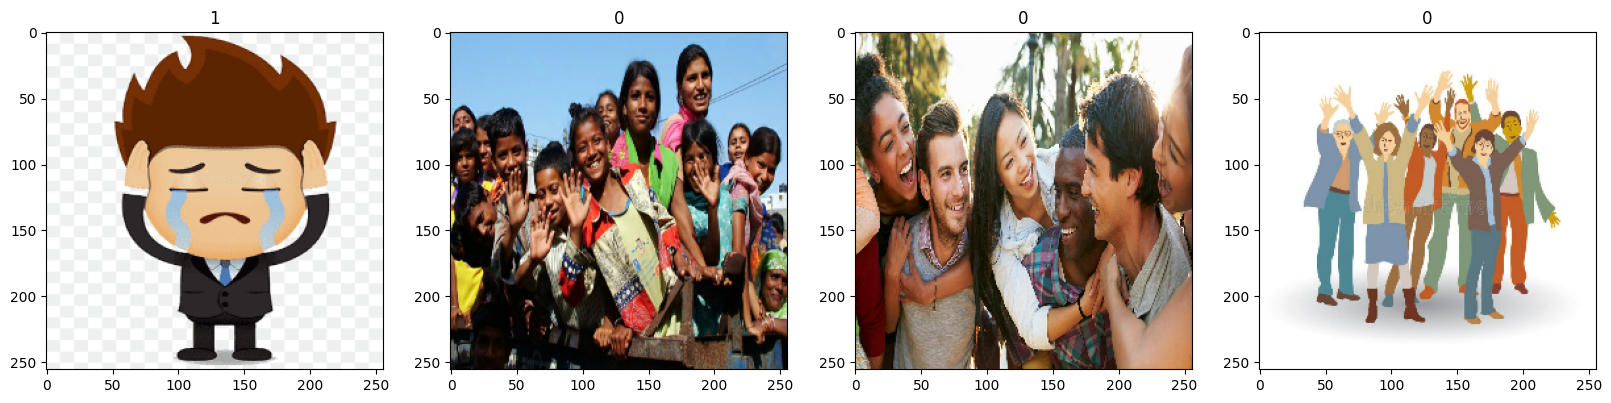

In [18]:
#plot the images to verify the classes that are assigned to the images
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
#visualize the minimum value in the array
batch[0].min()

0.0

In [20]:
# visualize the maximum value in the array
batch[0].max()

255.0

In [21]:
#preprocess Data
#Scale Data
data=data.map(lambda x,y:(x/255,y))

In [22]:
scaled_iterator=data.as_numpy_iterator()

In [23]:
batch=scaled_iterator.next()

In [24]:
batch[0].max()

1.0

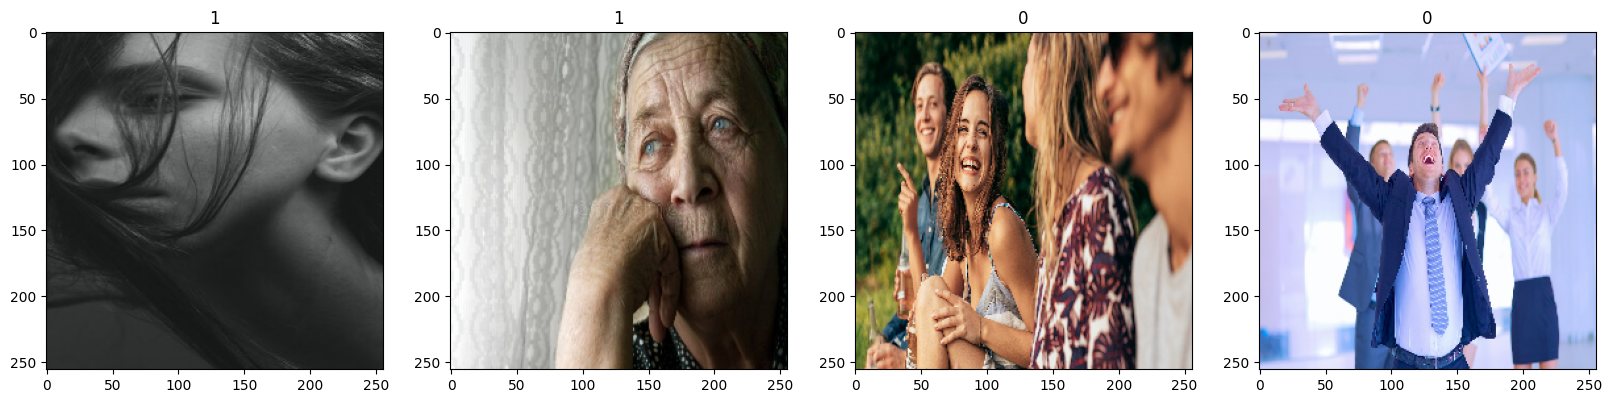

In [25]:
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate (batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [26]:
#Split Data
len(data)

5

In [27]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [28]:
#separating the data that has been assigned to train validation and test
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [29]:
#Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Input

In [30]:
#create a model
model=Sequential()

In [31]:
#Add on the layers to the model
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
 
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
logdir='logs'

In [35]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist=model.fit(train,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


I0000 00:00:1733838360.285360      77 service.cc:145] XLA service 0x7dae58006e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733838360.285433      77 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733838360.285440      77 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733838366.501261      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 930ms/step - accuracy: 0.5091 - loss: 2.0313 - val_accuracy: 0.3438 - val_loss: 1.7196
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 779ms/step - accuracy: 0.5534 - loss: 1.0733 - val_accuracy: 0.5000 - val_loss: 0.9843
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5547 - loss: 0.7929 - val_accuracy: 0.5938 - val_loss: 0.6435
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 780ms/step - accuracy: 0.6823 - loss: 0.6102 - val_accuracy: 0.6875 - val_loss: 0.6176
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8047 - loss: 0.6137 - val_accuracy: 0.9375 - val_loss: 0.5666
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8333 - loss: 0.5771 - val_accuracy: 0.6875 - val_loss: 0.5682
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 0.7266 - loss: 0.5240 - val_accuracy: 0.8750 - val_loss: 0.4176
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8711 - loss: 0.4520 - val_accuracy: 0.8750 - val_loss: 0.3709
Epoch 9/20
3/3

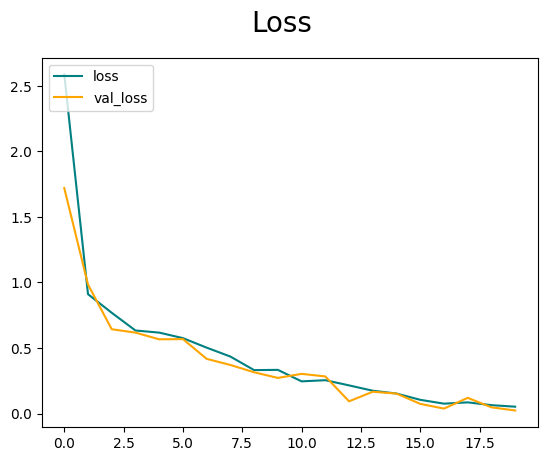

In [37]:
#Plot the train loss[teal] vs validation loss[orange]
fig =plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

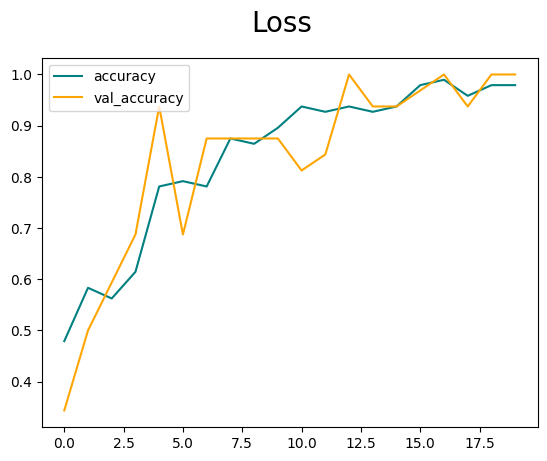

In [38]:
#visualize the training and validation accuracy
fig =plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
#Evaluate the model
from tensorflow.keras.metrics import Precision, Recall,BinaryAccuracy

In [40]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step


In [42]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Acurracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Acurracy: 1.0


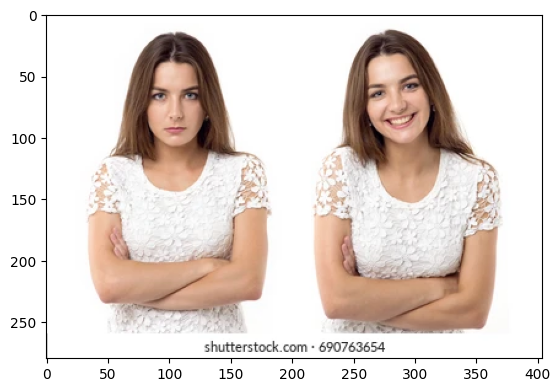

In [43]:
# Test
img=cv2.imread('/kaggle/input/test-data1/combina1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

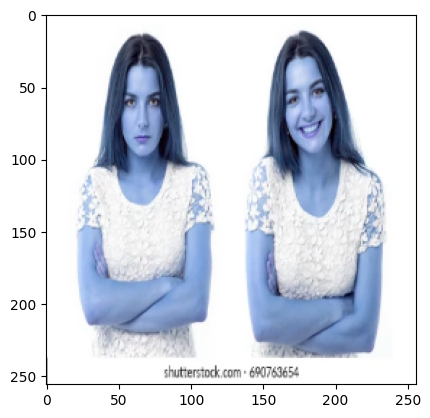

In [44]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


In [46]:
yhat

array([[0.8729382]], dtype=float32)

In [47]:
if yhat>0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad


In [48]:
#Saving the model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','happysadimagemodel.h5'))

In [51]:
new_model=load_model(os.path.join('models','happysadimagemodel.h5'))

In [52]:
os.path.join('models','happysadimagemodel.h5')

'models/happysadimagemodel.h5'

In [53]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0.8729382]], dtype=float32)